In [1]:
classes={
    0:"L",
    1:"O",
    2:"V",
    3:"E"
}
classes

{0: 'L', 1: 'O', 2: 'V', 3: 'E'}

In [10]:
import torch
X = torch.Tensor(
    [
       [[1,0,0,0,0],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [1,1,1,1,1]],

      [[1,1,1,1,1],
       [1,0,0,0,1],
       [1,0,0,0,1],
       [1,0,0,0,1],
       [1,1,1,1,1]],

       [[1,0,0,0,1],
        [1,0,0,0,1],
        [1,0,0,0,1],
        [0,1,1,1,0],
        [0,0,1,0,0]],

       [[1,1,1,1,1],
        [1,0,0,0,0],
        [1,1,1,1,1],
        [1,0,0,0,0],
        [1,1,1,1,1]]


    ]
)

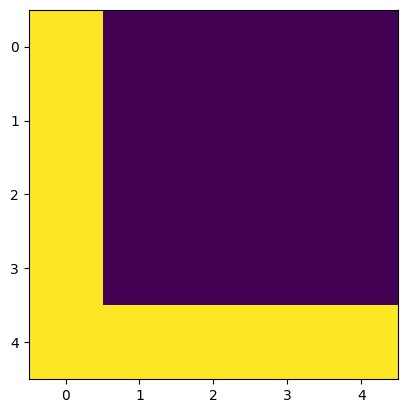

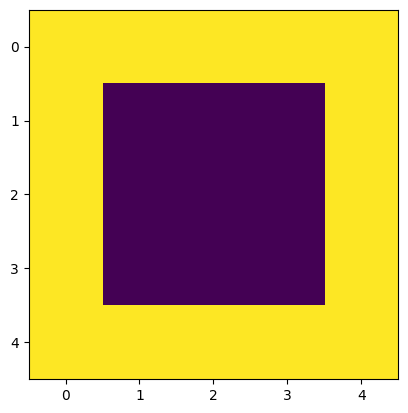

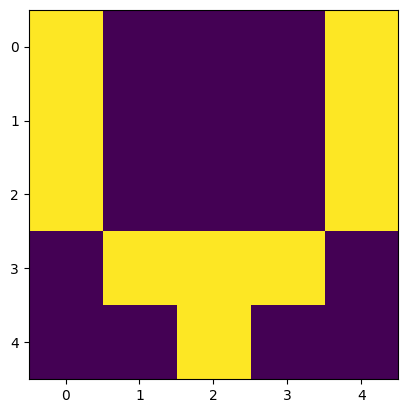

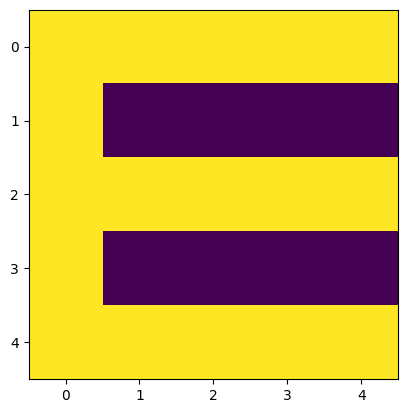

In [12]:
import matplotlib.pyplot as plt
for i in range(4):
  plt.imshow(X[i])
  plt.show()

In [15]:
y = torch.Tensor([0,1,2,3])
classes[y[0].item()]

'L'

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class Dense(nn.Module):
  def __init__(self, x):
    super().__init__()
    self.fc1 = nn.Linear(25,32)
    self.fc2 = nn.Linear(32,32)
    self.fc3 = nn.Linear(32,4)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [20]:
net = Dense(X)

In [22]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)
epochs = 100

In [28]:
losses = []
for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = net.forward(X.view(-1,25))
  loss = loss_fn(outputs, y.long())
  loss.backward()
  optimizer.step()
  losses.append(loss.item())



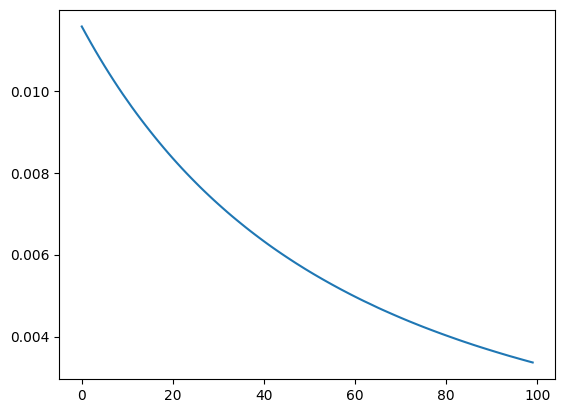

In [29]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [32]:
o = torch.Tensor(
    [
        [1,0,0,0,0],
        [1,0,0,1,0],
        [1,0,0,1,0],
        [1,0,0,1,0],
        [1,1,1,1,1]
    ]
)

In [33]:
classes[net(o.view(-1,25)).max(dim=1)[1].item()]

'L'

全結合ニューラルネットワークについて勉強しました。


In [ ]:
全結合ニューラルネットワーク（Fully Connected Neural Network、FCNN）は、各ニューロンが前の層の全てのニューロンと接続されているニューラルネットワークの一種
勾配消失問題（gradient vanishing problem）は、深層ニューラルネットワークを訓練する際に発生する重要な課題の一つです。具体的には、逆伝播アルゴリズムで勾配（微分値）を計算し重みを更新する際、勾配が層を遡るごとに極端に小さくなってしまう問題を指します。これにより、前の層の重みがほとんど更新されず、学習が進まなくなるという現象が起こります。

簡単に言えば、ニューラルネットワークが深くなるにつれて、初期層の重みがほとんど変わらなくなり、ネットワーク全体の学習が止まってしまうことです。

